# Explore here

In [1]:
import requests
import pandas as pd

# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id":"CPIAUCSL",
    "api_key":"16dbd1bdceb90ffd932425b7e5c279fd",  
    "file_type":"json" 
}

def api_fed(url, parametros, realtime_start, realtime_end):

# Añadir fechas de busqueda 
    parametros["realtime_start"] = realtime_start
    parametros["realtime_end"] = realtime_end


# Realizar la solicitud GET
    response = requests.get(url, params=parametros)

    print(url)

# Verificar si la solicitud fue exitosa
    if response.status_code == 200:
    # Convertir la respuesta a formato JSON
        data = response.json()
    # Retorna la data 
        return data
    else:
        print(f"Error en la solicitud: {response.status_code}")


data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_CPIAUCSL = pd.DataFrame(data)

data_CPIAUCSL.head(2)


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [2]:
data_CPIAUCSL.columns

Index(['realtime_start', 'realtime_end', 'observation_start',
       'observation_end', 'units', 'output_type', 'file_type', 'order_by',
       'sort_order', 'count', 'offset', 'limit', 'observations'],
      dtype='object')

In [3]:
def obtener_observation_fed(data_CPIAUCSL):
    # Convertir la columna "observations" que contiene JSON en un DataFrame
    observations_data = pd.json_normalize(data_CPIAUCSL["observations"])
    
    # Concatenar el DataFrame original con el nuevo DataFrame de las observaciones
    data_CPIAUCSL = pd.concat([data_CPIAUCSL.drop(columns=["observations"]), observations_data], axis=1)

    return data_CPIAUCSL

# Ejecutar la función para obtener los datos procesados
data_CPIAUCSL = obtener_observation_fed(data_CPIAUCSL)

def guardar_csv(data , url_archivo):
    data.to_csv(url_archivo, index= True)




In [4]:
#data_fed_cpi.head(10)
data_CPIAUCSL.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
1171,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-09-11,2024-11-08,2024-08-01,314.121
1172,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1173,0,100000,2024-10-10,2024-11-08,2024-09-01,314.686


In [5]:
guardar_csv(data_CPIAUCSL , "../data/raw/fed_CPIAUCSL_historical_data.csv")

Producto interno bruto='GNP"
Api_key='b55d1a0787bb20a7fcc6aef921343008'

In [6]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id": "GNP",
    "api_key": "b55d1a0787bb20a7fcc6aef921343008",  
    "file_type": "json" 
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_GNP = pd.DataFrame(data)

data_GNP.head(2)


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [7]:
# Ejecutar la función para obtener los datos procesados
data_GNP = obtener_observation_fed(data_GNP)


In [8]:
#data_GNPCA.head(2)
data_GNP.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
536,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-08-29,2024-09-25,2024-04-01,28779.676
537,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,538,0,100000,2024-09-26,2024-11-08,2024-04-01,29076.614


In [9]:
guardar_csv(data_GNP,"../data/raw/fed_GNP_historical_data.csv")

Tasa de desempleo='UNRATE'
Api_key='8660234b709531d44271bbd9520353dd'

In [10]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "8660234b709531d44271bbd9520353dd",  
    "file_type": "json",
    "series_id": "UNRATE"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_UNRATE = pd.DataFrame(data)

data_UNRATE.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [11]:
# Ejecutar la función para obtener los datos procesados
data_UNRATE = obtener_observation_fed(data_UNRATE)

In [12]:
data_UNRATE.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
972,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-10-04,2024-11-08,2024-09-01,4.1
973,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,974,0,100000,2024-11-01,2024-11-08,2024-10-01,4.1


In [13]:
guardar_csv(data_UNRATE,"../data/raw/fed_UNRATE_historical_data.csv")

Federal Funds Effective Rate (DFF)
Tasa de interes='DFF'
Api_key='78f1d1b71351546a936232d4d5469d80'

In [14]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "78f1d1b71351546a936232d4d5469d80",  
    "file_type": "json",
    "series_id": "DFF"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_DFF= pd.DataFrame(data)

data_DFF.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [15]:
# Ejecutar la función para obtener los datos procesados
data_DFF = obtener_observation_fed(data_DFF)

In [16]:
data_DFF.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
25696,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-07,2024-11-08,2024-11-06,4.83
25697,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25698,0,100000,2024-11-08,2024-11-08,2024-11-07,4.83


In [17]:
guardar_csv(data_DFF,"../data/raw/fed_DFF_historical_data.csv")

Trade Balance: Goods and Services, Balance of Payments Basis (BOPGSTB)
Tasa de interes='BOPGSTB'
Api_key='58f82a464f9ab2bc239793f7ebb937f7'

In [18]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "58f82a464f9ab2bc239793f7ebb937f7",  
    "file_type": "json",
    "series_id": "BOPGSTB"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2024-11-08")

data_BOPGSTB= pd.DataFrame(data)

data_BOPGSTB.head(2)

https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [19]:
# Ejecutar la función para obtener los datos procesados
data_BOPGSTB = obtener_observation_fed(data_BOPGSTB)

In [20]:
data_BOPGSTB.tail(5)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
873,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-09-04,2024-10-07,2024-07-01,-78791.0
874,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-10-08,2024-11-08,2024-07-01,-78918.0
875,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-10-08,2024-11-04,2024-08-01,-70431.0
876,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-08-01,-70787.0
877,2021-01-01,2024-11-08,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,878,0,100000,2024-11-05,2024-11-08,2024-09-01,-84359.0


In [21]:
guardar_csv(data_BOPGSTB,"../data/raw/fed_BOPGSTB_historical_data.csv")

Seleccionar solo las columnas de 'date' y 'value, agregar una más con el nombre de la variable

In [22]:
df_CPIAUCSL = data_CPIAUCSL[['date','value']].copy()
df_CPIAUCSL['date'] = pd.to_datetime(df_CPIAUCSL['date'])
df_CPIAUCSL['value'] = pd.to_numeric(df_CPIAUCSL['value'], errors='coerce')
df_CPIAUCSL['value'] = df_CPIAUCSL['value'].apply(lambda x: x*1000 if x < 500 else x)
df_CPIAUCSL['IPC_value'] = df_CPIAUCSL['value']
df_CPIAUCSL = df_CPIAUCSL.drop('value', axis=1)
df_CPIAUCSL = df_CPIAUCSL.drop_duplicates(subset=['date'], keep='last')
df_CPIAUCSL.set_index('date', inplace=True)

# Cambiar la frecuencia a diaria y rellenar con NaN
df_IPC_D = df_CPIAUCSL.resample('D').asfreq()

# Función personalizada para interpolar el valor y calcular variación diaria
def interpolar_valor(df_CPIAUCSL):
    # Interpolar valores entre meses
    df_interpolado = df_CPIAUCSL.resample('D').interpolate(method='linear')
    
    # Calcular la variación diaria como porcentaje
    df_interpolado['IPC_var'] = df_interpolado['IPC_value'].pct_change().round(5) * 100
    
    return df_interpolado

# Aplicar la función a los datos diarios
df_IPC_D = interpolar_valor(df_CPIAUCSL)

#df_IPC_D = df_IPC_D[(df_IPC_D['date'] >= '2021-01-01') & (df_IPC_D['date'] <= '2023-12-31')]
df_IPC_D

,IPC_value,IPC_var
date,,
1947-01-01,21480.000000,NaN
1947-01-02,21484.516129,0.021
1947-01-03,21489.032258,0.021
1947-01-04,21493.548387,0.021
1947-01-05,21498.064516,0.021
...,...,...
2024-08-28,314613.096774,0.006
2024-08-29,314631.322581,0.006
2024-08-30,314649.548387,0.006


In [23]:
df_BOPGSTBL = data_BOPGSTB[['date','value']].copy()
df_BOPGSTBL['date'] = pd.to_datetime(df_BOPGSTBL['date'])
df_BOPGSTBL['value'] = pd.to_numeric(df_BOPGSTBL['value'], errors='coerce')
df_BOPGSTBL['BC_value'] = df_BOPGSTBL['value'].apply(lambda x: x/100000000000 if x < -200000 else x)
df_BOPGSTBL = df_BOPGSTBL.drop('value', axis=1)
df_BOPGSTBL = df_BOPGSTBL.drop_duplicates(subset=['date'], keep='last')
df_BOPGSTBL.set_index('date', inplace=True)

df_BC_D = df_BOPGSTBL.resample('D').asfreq()
df_BC_D = df_BC_D.resample('D').interpolate(method='linear')
df_BC_D['BC_var'] = df_BC_D['BC_value'].pct_change().round(5) * 100
 
df_BC_D

,BC_value,BC_var
date,,
1992-01-01,-2026.000000,NaN
1992-01-02,-1987.451613,-1.903
1992-01-03,-1948.903226,-1.940
1992-01-04,-1910.354839,-1.978
1992-01-05,-1871.806452,-2.018
...,...,...
2024-08-28,-82607.774194,0.533
2024-08-29,-83045.580645,0.530
2024-08-30,-83483.387097,0.527


In [24]:
df_DFF = data_DFF[['date','value']].copy()

df_DFF['date'] = pd.to_datetime(df_DFF['date'])
df_DFF['value'] = pd.to_numeric(df_DFF['value'], errors='coerce')
df_DFF['TPM_value'] = df_DFF['value']
df_DFF['TPM_var'] = df_DFF['value'].pct_change().round(5) * 100
df_DFF = df_DFF.drop('value', axis=1)
df_DFF = df_DFF.drop_duplicates(subset=['date'], keep='last')
df_DFF.set_index('date', inplace=True)

df_DFF

,TPM_value,TPM_var
date,,
1954-07-01,1.13,NaN
1954-07-02,1.25,10.619
1954-07-03,1.25,0.000
1954-07-04,1.25,0.000
1954-07-05,0.88,-29.600
...,...,...
2024-11-03,4.83,0.000
2024-11-04,4.83,0.000
2024-11-05,4.83,0.000


In [25]:
df_GNP = data_GNP[['date','value']].copy()
df_GNP['date'] = pd.to_datetime(df_GNP['date'])
df_GNP['value'] = pd.to_numeric(df_GNP['value'], errors='coerce')
df_GNP['PIB_value'] = df_GNP['value'].apply(lambda x: x*1000 if x < 30000 else x)
df_GNP = df_GNP.drop('value', axis=1)
df_GNP = df_GNP.drop_duplicates(subset=['date'], keep='last')
df_GNP.set_index('date', inplace=True)

df_PIB_D = df_GNP.resample('D').asfreq()
df_PIB_D = df_PIB_D.resample('D').interpolate(method='linear')
df_PIB_D['PIB_var'] = df_PIB_D['PIB_value'].pct_change().round(5) * 100

df_PIB_D

,PIB_value,PIB_var
date,,
1939-01-01,NaN,NaN
1939-01-02,NaN,NaN
1939-01-03,NaN,NaN
1939-01-04,NaN,NaN
1939-01-05,NaN,NaN
...,...,...
2024-03-28,2.906033e+07,0.014
2024-03-29,2.906440e+07,0.014
2024-03-30,2.906847e+07,0.014


In [26]:
df_UNRATE = data_UNRATE[['date','value']].copy()
df_UNRATE['date'] = pd.to_datetime(df_UNRATE['date'])
df_UNRATE['value'] = pd.to_numeric(df_UNRATE['value'], errors='coerce')
df_UNRATE['TDES_value'] = df_UNRATE['value']
df_UNRATE = df_UNRATE.drop('value', axis=1)
df_UNRATE = df_UNRATE.drop_duplicates(subset=['date'], keep='last')
df_UNRATE.set_index('date', inplace=True)
df_TDES_D = df_UNRATE.resample('D').asfreq()
df_TDES_D = df_TDES_D.resample('D').interpolate(method='linear')
df_TDES_D['TDES_var'] = df_TDES_D['TDES_value'].pct_change().round(5) * 100

df_TDES_D

,TDES_value,TDES_var
date,,
1948-01-01,3.400000,NaN
1948-01-02,3.412903,0.380
1948-01-03,3.425806,0.378
1948-01-04,3.438710,0.377
1948-01-05,3.451613,0.375
...,...,...
2024-09-27,4.100000,0.000
2024-09-28,4.100000,0.000
2024-09-29,4.100000,0.000


Guardar df's en carpeta processed, tienen solo las columnas valor, date y nombre

In [27]:
guardar_csv(df_BC_D,"../data/processed/df_balanzacomercial_diario.csv")
guardar_csv(df_IPC_D,"../data/processed/df_indicepreciosconsumidor_diario.csv")
guardar_csv(df_DFF,"../data/processed/df_tasainteres_diario.csv")
guardar_csv(df_PIB_D,"../data/processed/df_productointernobruto_diario.csv")
guardar_csv(df_TDES_D,"../data/processed/df_tasadesempleo_diario.csv")

Consolidar los df's en uno solo, porque comparten las mismas columnas

Guardar dataframe consolidado

### Valor de los activos 

In [28]:
import requests
import csv
import json
from datetime import datetime, timedelta

# API Key de Polygon.io
key_activos = '2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI'

# Símbolos de los activos
activos = {      
    'VTI': 'VTI',          
    'Oro': 'C:XAUUSD',       
    'Bitcoin': 'X:BTCUSD'    
}

# Función para consultar datos históricos de un activo
def api_activos(key_activos, activo, timespan='day', start_date=None, end_date=None):
    # URL de la API para obtener los datos históricos
    url = f'https://api.polygon.io/v2/aggs/ticker/{activo}/range/1/{timespan}/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={key_activos}'
    
    # Hacer la solicitud GET a la API de Polygon.io
    response = requests.get(url)
    print(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        print ("bien")

        if 'results' in data:
            return data['results']  # Devolver solo los resultados
        else:
            print("No se encontraron resultados en la respuesta.")
            return []
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return []


# Llamar a la función para cada activo y guardar los datos en archivos CSV separados

# Obtener y guardar datos del VTI
historical_data_vti = api_activos(key_activos, activos['VTI'], 'day', "2021-01-01", "2024-11-08")
vti = pd.DataFrame(historical_data_vti)
guardar_csv(vti, '../data/VTI_historical_data.csv')




https://api.polygon.io/v2/aggs/ticker/VTI/range/1/day/2021-01-01/2024-11-08?adjusted=true&sort=asc&apiKey=2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI
bien


In [29]:

# convertir a fecha 

vti['t'] = pd.to_datetime(vti['t'], unit='ms').dt.strftime('%Y-%m-%d')
vti

,v,vw,o,c,h,l,t,n
0,4248218.0,199.7847,199.26,198.35,200.920,198.2100,2022-11-14,72199
1,4605700.0,200.6384,201.50,200.36,202.140,198.3400,2022-11-15,74446
2,2904962.0,198.6937,199.45,198.32,199.720,198.0300,2022-11-16,58235
3,3705403.0,196.8776,195.67,197.49,197.895,195.4500,2022-11-17,62114
4,3039298.0,197.9824,199.08,198.42,199.410,196.9000,2022-11-18,53567
...,...,...,...,...,...,...,...,...
495,2383851.0,282.1086,282.17,281.72,283.070,280.8650,2024-11-04,68707
496,2056304.0,284.1608,282.11,285.30,285.300,282.0100,2024-11-05,46980
497,5668856.0,292.1445,292.30,293.28,293.610,290.2100,2024-11-06,90681
498,4095995.0,294.9238,294.02,295.33,295.900,294.0100,2024-11-07,75094


In [30]:
vti.drop(['v', 'vw', 'o', 'h', 'l', 'n'], axis = 1, inplace = True)


In [31]:
vti

,c,t
0,198.35,2022-11-14
1,200.36,2022-11-15
2,198.32,2022-11-16
3,197.49,2022-11-17
4,198.42,2022-11-18
...,...,...
495,281.72,2024-11-04
496,285.30,2024-11-05
497,293.28,2024-11-06
498,295.33,2024-11-07


In [32]:
vti

,c,t
0,198.35,2022-11-14
1,200.36,2022-11-15
2,198.32,2022-11-16
3,197.49,2022-11-17
4,198.42,2022-11-18
...,...,...
495,281.72,2024-11-04
496,285.30,2024-11-05
497,293.28,2024-11-06
498,295.33,2024-11-07


In [33]:
vti = vti.rename(columns = {'c' : 'VTI_value'})
vti = vti.rename(columns = {'t' : 'date'})



In [34]:
# Calcular el valor del VTI cinco días antes y añadirlo al DataFrame

vti['VTI_6_days_ago'] = vti['VTI_value'].shift(6)

In [35]:
vti['pct_change_6d'] = vti['VTI_6_days_ago'].pct_change(6) * 100

In [36]:
vti = vti.set_index("date")

vti

,VTI_value,VTI_6_days_ago,pct_change_6d
date,,,
2022-11-14,198.35,NaN,NaN
2022-11-15,200.36,NaN,NaN
2022-11-16,198.32,NaN,NaN
2022-11-17,197.49,NaN,NaN
2022-11-18,198.42,NaN,NaN
...,...,...,...
2024-11-04,281.72,285.54,-0.771476
2024-11-05,285.30,286.70,-0.758074
2024-11-06,293.28,287.08,-0.312522


In [37]:
# Crear un rango de fechas para el índice
fecha_inicio = '2022-12-01'
fecha_fin = '2024-11-08'

rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')


# Crear el DataFrame base con el índice de fechas
df_indicadores_D = pd.DataFrame(index=rango_fechas)

# Llenar el DataFrame base con datos de otros DataFrames
df_indicadores_D = df_indicadores_D.join(df_DFF, how='left')
df_indicadores_D = df_indicadores_D.join(df_TDES_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_IPC_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_PIB_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_BC_D, how='left')

df_indicadores_D.fillna(method='ffill', inplace=True)

df_indicadores_D

/tmp/ipykernel_22981/2504329864.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_indicadores_D.fillna(method='ffill', inplace=True)


,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-12-01,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388
2022-12-02,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037
2022-12-03,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037
2022-12-04,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037
2022-12-05,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037
...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-05,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-06,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-07,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522


In [38]:
df_indicadores_D.index= pd.to_datetime(df_indicadores_D.index, unit='ms').strftime('%Y-%m-%d')

In [39]:
df_indicadores_D = df_indicadores_D.join(vti, how = 'left')

df_indicadores_D

,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var,VTI_value,VTI_6_days_ago,pct_change_6d
2022-12-01,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388,204.18,200.17,0.917570
2022-12-02,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037,203.99,201.39,0.514075
2022-12-03,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037,NaN,NaN,NaN
2022-12-04,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037,NaN,NaN,NaN
2022-12-05,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037,199.98,201.54,1.623639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,281.72,285.54,-0.771476
2024-11-05,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,285.30,286.70,-0.758074
2024-11-06,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,293.28,287.08,-0.312522
2024-11-07,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522,295.33,286.37,-0.444985


In [40]:
df_indicadores_D = df_indicadores_D [['VTI_value', 'VTI_6_days_ago', 'pct_change_6d', 'TPM_value', 'TPM_var','TDES_value', 'TDES_var', 'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var']]

df_indicadores_D

,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-12-01,204.18,200.17,0.917570,3.83,0.0,3.500000,-0.095,298812.000000,0.002,2.713360e+07,0.016,-70762.000000,0.388
2022-12-02,203.99,201.39,0.514075,3.83,0.0,3.496774,-0.092,298861.806452,0.017,2.713782e+07,0.016,-70736.129032,-0.037
2022-12-03,NaN,NaN,NaN,3.83,0.0,3.493548,-0.092,298911.612903,0.017,2.714204e+07,0.016,-70710.258065,-0.037
2022-12-04,NaN,NaN,NaN,3.83,0.0,3.490323,-0.092,298961.419355,0.017,2.714626e+07,0.016,-70684.387097,-0.037
2022-12-05,199.98,201.54,1.623639,3.83,0.0,3.487097,-0.092,299011.225806,0.017,2.715048e+07,0.016,-70658.516129,-0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-04,281.72,285.54,-0.771476,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-05,285.30,286.70,-0.758074,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-06,293.28,287.08,-0.312522,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522
2024-11-07,295.33,286.37,-0.444985,4.83,0.0,4.100000,0.000,314686.000000,0.006,2.907661e+07,0.014,-84359.000000,0.522


In [41]:
# Eliminar filas donde 'columna_objetivo' es NaN
df_indicadores_D = df_indicadores_D.dropna(subset=['VTI_value'])
# Reemplazar NaN con el valor anterior en cada columna

df_indicadores_D = df_indicadores_D.ffill()
df_indicadores_D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 2022-12-01 to 2024-11-08
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VTI_value       488 non-null    float64
 1   VTI_6_days_ago  488 non-null    float64
 2   pct_change_6d   488 non-null    float64
 3   TPM_value       488 non-null    float64
 4   TPM_var         488 non-null    float64
 5   TDES_value      488 non-null    float64
 6   TDES_var        488 non-null    float64
 7   IPC_value       488 non-null    float64
 8   IPC_var         488 non-null    float64
 9   PIB_value       488 non-null    float64
 10  PIB_var         488 non-null    float64
 11  BC_value        488 non-null    float64
 12  BC_var          488 non-null    float64
dtypes: float64(13)
memory usage: 53.4+ KB


In [42]:
#Variables a eliminar
df_indicadores_D = df_indicadores_D.drop(['IPC_value','PIB_value','PIB_var','BC_value','TDES_value','TPM_value'],axis=1)

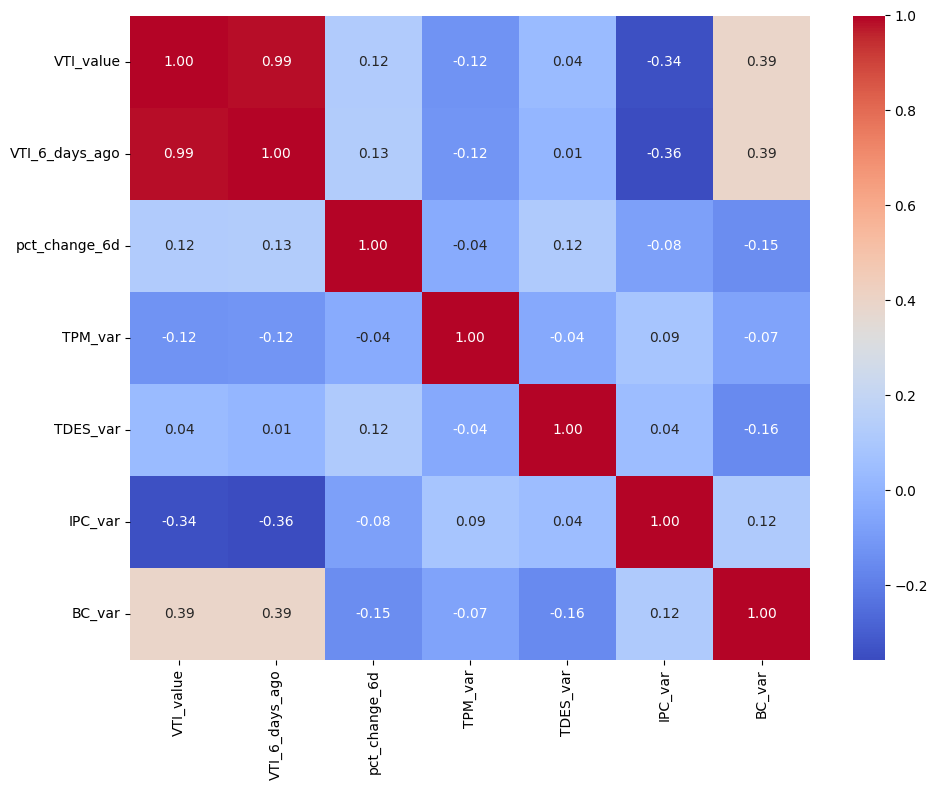

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df_indicadores_D.corr()

# Ajustar el tamaño de la figura y el formato de los números en el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según lo necesites
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Mejorar el espaciado
plt.tight_layout()
plt.show()

In [44]:
df_indicadores_D.columns


Index(['VTI_value', 'VTI_6_days_ago', 'pct_change_6d', 'TPM_var', 'TDES_var',
       'IPC_var', 'BC_var'],
      dtype='object')

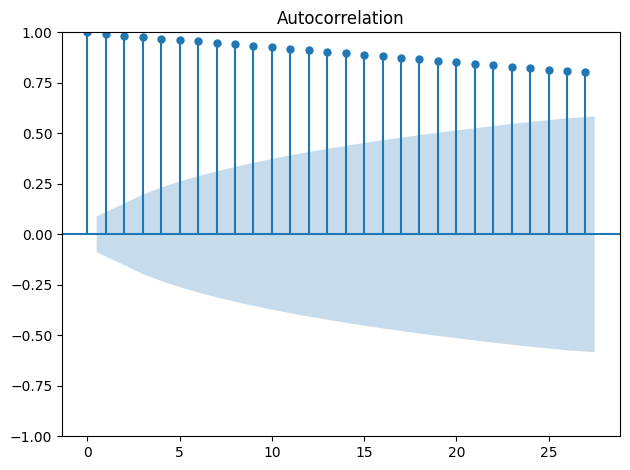

In [45]:
# Autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
df_auto_vti = df_indicadores_D['VTI_value']
plot_acf(df_auto_vti)

plt.tight_layout()

plt.show()

In [46]:
df_indicadores_D = df_indicadores_D.reset_index()
df_indicadores_D.rename(columns={'index': 'date'}, inplace=True)
df_indicadores_D['date'] = pd.to_datetime(df_indicadores_D['date']).dt.date

df_indicadores_D.head(7)

,date,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037
3,2022-12-06,196.98,198.27,0.394957,0.0,-0.093,0.017,-0.037
4,2022-12-07,196.66,197.96,-0.231831,0.0,-0.093,0.017,-0.037
5,2022-12-08,198.36,204.06,3.279684,0.0,-0.093,0.017,-0.037
6,2022-12-09,196.70,204.18,2.003297,0.0,-0.093,0.017,-0.037


Modelos de series temporales multivariantes

In [47]:
# Supongamos que tu DataFrame tiene la columna de fechas llamada 'date'
df_indicadores_D = df_indicadores_D.rename(columns={'date': 'ds'})  # Cambia 'date' a 'ds'

# Asegúrate también de que el valor del VTI esté en una columna llamada 'y'
df_indicadores_D = df_indicadores_D.rename(columns={'VTI_value': 'y'})  # Cambia 'VTI_value' a 'y'


In [48]:
df_indicadores_D

,ds,y,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037
3,2022-12-06,196.98,198.27,0.394957,0.0,-0.093,0.017,-0.037
4,2022-12-07,196.66,197.96,-0.231831,0.0,-0.093,0.017,-0.037
...,...,...,...,...,...,...,...,...
483,2024-11-04,281.72,285.54,-0.771476,0.0,0.000,0.006,0.522
484,2024-11-05,285.30,286.70,-0.758074,0.0,0.000,0.006,0.522
485,2024-11-06,293.28,287.08,-0.312522,0.0,0.000,0.006,0.522
486,2024-11-07,295.33,286.37,-0.444985,0.0,0.000,0.006,0.522


In [49]:
df_indicadores_D.shape

(488, 8)

In [50]:
# Calcula la diferencia entre fechas para verificar la frecuencia
diffs = df_indicadores_D['ds'].diff().value_counts()
print("Frecuencia de diferencias entre fechas:")
print(diffs)


Frecuencia de diferencias entre fechas:
ds
1 days    382
3 days     86
4 days     15
2 days      4
Name: count, dtype: int64


In [51]:
df_indicadores_D.set_index('ds', inplace=True)

In [52]:
df_indicadores_D = df_indicadores_D.reindex(pd.date_range(start=df_indicadores_D.index.min(), end=df_indicadores_D.index.max(), freq='D'))


In [53]:
df_indicadores_D.fillna(method='ffill', inplace=True)


/tmp/ipykernel_22981/1915446163.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_indicadores_D.fillna(method='ffill', inplace=True)


In [54]:
df_indicadores_D.reset_index(inplace=True)
df_indicadores_D.rename(columns={'index': 'ds'}, inplace=True)

In [55]:
df_indicadores_D['ds'] = pd.to_datetime(df_indicadores_D['ds'])


In [56]:
# Calcula la diferencia entre fechas para verificar la frecuencia
diffs = df_indicadores_D['ds'].diff().value_counts()
print("Frecuencia de diferencias entre fechas:")
print(diffs)

Frecuencia de diferencias entre fechas:
ds
1 days    708
Name: count, dtype: int64


In [57]:
df_indicadores_D.head()

,ds,y,VTI_6_days_ago,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-12-01,204.18,200.17,0.917570,0.0,-0.095,0.002,0.388
1,2022-12-02,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
2,2022-12-03,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
3,2022-12-04,203.99,201.39,0.514075,0.0,-0.092,0.017,-0.037
4,2022-12-05,199.98,201.54,1.623639,0.0,-0.092,0.017,-0.037


In [58]:
df_indicadores_D.shape

(709, 8)

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for Autoregression. Number of lags for regressor is automatically set to 1
INFO - (NP.forecaster.add_lagged_regressor) - n_lags = 'auto', but there is no lags for A

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (23) is too small than the required number                     for the learning rate finder (222). The results might not be optimal.


Finding best initial lr:   0%|          | 0/222 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.859% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the d

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


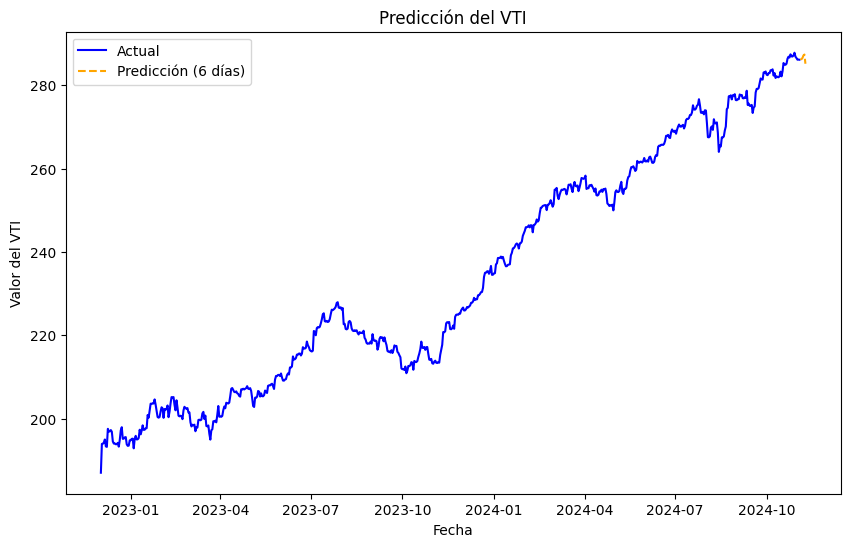

In [59]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

# Configura el modelo de NeuralProphet
m = NeuralProphet()

# Agrega los regresores necesarios
m = m.add_lagged_regressor(names='VTI_6_days_ago')
m = m.add_lagged_regressor(names='pct_change_6d')
m = m.add_lagged_regressor(names='TPM_var')
m = m.add_lagged_regressor(names='TDES_var')
m = m.add_lagged_regressor(names='IPC_var')
m = m.add_lagged_regressor(names='BC_var')

# Asegúrate de que el DataFrame tiene las columnas `ds` y `y`
df_indicadores_D = df_indicadores_D.rename(columns={'date': 'ds', 'VTI_value': 'y'})

# Ajusta el modelo con el conjunto de datos
metrics = m.fit(df_indicadores_D, freq="D")

# Genera un DataFrame futuro para realizar predicciones
future = m.make_future_dataframe(df_indicadores_D, periods=6, n_historic_predictions=True)

# Realiza la predicción
forecast = m.predict(future)

# Divide el DataFrame en histórico y predicción
actual = forecast[forecast['ds'] < future['ds'].max() - pd.Timedelta(days=5)]
prediction = forecast[forecast['ds'] >= future['ds'].max() - pd.Timedelta(days=5)]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(actual['ds'], actual['yhat1'], label='Actual', color='blue')
plt.plot(prediction['ds'], prediction['yhat1'], label='Predicción (6 días)', color='orange', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor del VTI')
plt.title('Predicción del VTI')
plt.legend()
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error
import math

# Ensure 'ds' column in both DataFrames is in datetime format
df_indicadores_D['ds'] = pd.to_datetime(df_indicadores_D['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Merge the DataFrames on 'ds'
df_results = pd.merge(df_indicadores_D[['ds', 'y']], forecast[['ds', 'yhat1']], on='ds')

# Drop rows with NaN values in 'y' or 'yhat1'
df_results = df_results.dropna(subset=['y', 'yhat1'])

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(df_results['y'], df_results['yhat1']))

print('RMSE:', rmse)


RMSE: 3.693374937964868


In [61]:
guardar_csv(df_indicadores_D,"../data/processed/total_data.csv")

In [62]:
import pickle
# Guardar el modelo en un archivo .pkl
with open("/workspaces/proyecto_DataScience_DMS/models/NeuralProphet_default.pkl", "wb") as f:
    pickle.dump(m, f)